In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp

In [2]:
cholera = pd.read_csv('./data/cholera-clean.csv', index_col=0)

# Does cholera cause dehydration?

In [19]:
cholera.head()

,age,sex,Dehydration_level,Resting_blood_pressure,Average_cholesterol,Presence_of_seizures,Vomit_color,Gastric_acid_index,Blood_type_0,Feces_consistency,Exposure_to,Presence_of_fever,Cholera_test_result
0,63,Male,Severe,145,233.0,True,Normal,150,False,Normal,No exposure,False,True
1,37,Male,High,130,250.0,False,Abnormal,187,False,Normal,No exposure,False,True
2,41,Female,Moderate,130,204.0,False,Normal,172,False,Rice Water,No exposure,False,True
3,56,Male,Moderate,120,236.0,False,Abnormal,178,False,Rice Water,No exposure,False,True
4,57,Female,Mild,120,354.0,False,Abnormal,163,True,Rice Water,No exposure,False,True


In [20]:
cholera['Dehydration_level'].unique()

array(['Severe', 'High', 'Moderate', 'Mild'], dtype=object)

In [21]:
cholera['Cholera_test_result'].unique()

array([ True, False])

In [22]:
cholera.groupby('Dehydration_level').count()['Cholera_test_result']

Dehydration_level
High         84
Mild        142
Moderate     49
Severe       23
Name: Cholera_test_result, dtype: int64

In [23]:
cholera.groupby('Dehydration_level').sum()['Cholera_test_result']

Dehydration_level
High        66.0
Mild        39.0
Moderate    40.0
Severe      16.0
Name: Cholera_test_result, dtype: float64

In [24]:
sum_df = pd.DataFrame([cholera.groupby('Dehydration_level').sum()['Cholera_test_result'], cholera.groupby('Dehydration_level').count()['Cholera_test_result']])

In [25]:
sum_df.head()

Dehydration_level,High,Mild,Moderate,Severe
Cholera_test_result,66.0,39.0,40.0,16.0
Cholera_test_result,84.0,142.0,49.0,23.0


In [26]:
sum_df = sum_df.transpose()

In [27]:
sum_df.head()

,Cholera_test_result,Cholera_test_result
Dehydration_level,,
High,66.0,84.0
Mild,39.0,142.0
Moderate,40.0,49.0
Severe,16.0,23.0


In [29]:
sum_df.columns = ['Positive_cholera', 'Total']

In [30]:
sum_df.head()

,Positive_cholera,Total
Dehydration_level,,
High,66.0,84.0
Mild,39.0,142.0
Moderate,40.0,49.0
Severe,16.0,23.0


In [31]:
sum_df['Positive_perc'] = sum_df['Positive_cholera'] / sum_df['Total']

In [32]:
sum_df.head()

,Positive_cholera,Total,Positive_perc
Dehydration_level,,,
High,66.0,84.0,0.785714
Mild,39.0,142.0,0.274648
Moderate,40.0,49.0,0.816327
Severe,16.0,23.0,0.695652


In [33]:
sum_df = sum_df.reindex(index = ['Mild', 'Moderate', 'High', 'Severe'])

In [34]:
sum_df.head()

,Positive_cholera,Total,Positive_perc
Dehydration_level,,,
Mild,39.0,142.0,0.274648
Moderate,40.0,49.0,0.816327
High,66.0,84.0,0.785714
Severe,16.0,23.0,0.695652


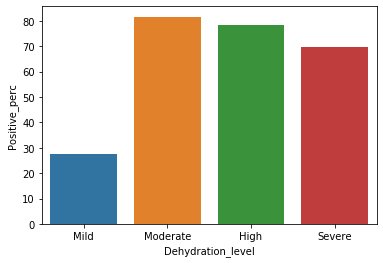

In [35]:
sns.barplot(sum_df.index, sum_df['Positive_perc']*100)

## We can see that the higher Dehydration levels have higher percentages of positive Cholera test, so we can say that Cholera may cause Dehydration

In [47]:
new_df = sum_df

In [48]:
new_df

,Positive_cholera,Total,Positive_perc,Negative_cholera
Dehydration_level,,,,
Mild,39.0,142.0,0.274648,39.0
Moderate,40.0,49.0,0.816327,40.0
High,66.0,84.0,0.785714,66.0
Severe,16.0,23.0,0.695652,16.0


In [49]:
new_df['Negative_cholera']= new_df['Total']-cholera.groupby('Dehydration_level').sum()['Cholera_test_result']

In [50]:
new_df.head()

,Positive_cholera,Total,Positive_perc,Negative_cholera
Dehydration_level,,,,
Mild,39.0,142.0,0.274648,103.0
Moderate,40.0,49.0,0.816327,9.0
High,66.0,84.0,0.785714,18.0
Severe,16.0,23.0,0.695652,7.0


In [52]:
new_df.drop(['Positive_perc'], axis = 1, inplace = True)

In [54]:
new_df = new_df[['Positive_cholera', 'Negative_cholera', 'Total']]

In [60]:
new_df = new_df.transpose()

In [61]:
new_df['Intense_Deh_levels'] = new_df['Moderate']+new_df['High']+new_df['Severe']

In [62]:
new_df.head()

Dehydration_level,Mild,Moderate,High,Severe,Intense_Deh_levels
Positive_cholera,39.0,40.0,66.0,16.0,122.0
Negative_cholera,103.0,9.0,18.0,7.0,34.0
Total,142.0,49.0,84.0,23.0,156.0


In [63]:
new_df.drop(['Moderate', 'High', 'Severe'], axis = 1, inplace = True)

In [65]:
new_df['Total'] = new_df['Mild'] + new_df['Intense_Deh_levels']

In [66]:
new_df['Mild_Perc'] = new_df['Mild'] / new_df['Total']

In [67]:
new_df['Intense_Perc'] = new_df['Intense_Deh_levels'] / new_df['Total']

In [68]:
new_df.head()

Dehydration_level,Mild,Intense_Deh_levels,Total,Mild_Perc,Intense_Perc
Positive_cholera,39.0,122.0,161.0,0.242236,0.757764
Negative_cholera,103.0,34.0,137.0,0.751825,0.248175
Total,142.0,156.0,298.0,0.476510,0.523490


In [70]:
new_df.drop(['Total'], axis = 0, inplace = True)

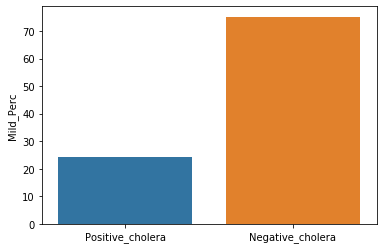

In [77]:
sns.barplot(new_df.index, new_df['Mild_Perc']*100)

In [84]:
a = new_df.reset_index()

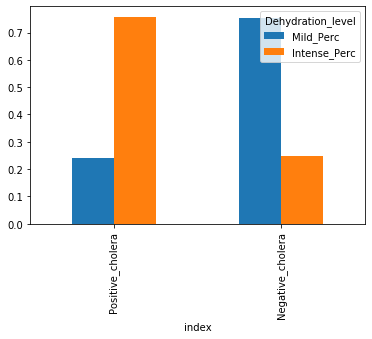

In [86]:
a.plot(x='index', y=['Mild_Perc', 'Intense_Perc'], kind="bar")
